### PDL Lab5. Text corpus creation and binary classification using DNN

### SWETHA JENIFER S 225229142


In [1]:
import numpy as np

def load_data():
    # Load motivational quotes and demotivational quotes from files
    with open('Happy_Quotes.txt', 'r', encoding='utf-8') as f:
        Happy_Quotes = f.readlines()
    with open('Sad_Quotes.txt', 'r', encoding='utf-8') as f:
        Sad_Quotes = f.readlines()

    # Combine both classes of quotes and create labels (1 for motivational, 0 for demotivational)
    quotes = Happy_Quotes + Sad_Quotes
    labels = np.concatenate([np.ones(len(Happy_Quotes)), np.zeros(len(Sad_Quotes))])

    return quotes, labels

quotes, labels = load_data()

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_data(quotes):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(quotes)
    sequences = tokenizer.texts_to_sequences(quotes)
    vocab_size = len(tokenizer.word_index) + 1

    # Pad the sequences to have the same length
    max_sequence_length = max(len(seq) for seq in sequences)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

    return padded_sequences, vocab_size

X, vocab_size = preprocess_data(quotes)

In [3]:
load_data()

(['மகிழ்ச்சி உனக்கு அழகு கொடுக்கும்.\n',
  'மகிழ்ச்சி என்பது ஒரு பெரிய ராஜா வாழ்க்கையை ஆட்சி செய்வது போன்றது.\n',
  'மகிழ்ச்சி இதயத்தின் இனிமையான ஆபரணம்\n',
  'மகிழ்ச்சி என்பது மழையைப் போன்றது\n',
  'என் அழகான கனவின் வேர் வழியாக மகிழ்ச்சி வந்தது\n',
  'துக்கத்தைத் தடுக்க நம்மைச் சுற்றி நாம் கட்டும் சுவர்கள் மகிழ்ச்சியைத் தடுக்கின்றன\n',
  "'மகிழ்ச்சி' என்ற வார்த்தை சோகத்தால் சமநிலைப்படுத்தப்படாவிட்டால் அதன் அர்த்தத்தை இழந்துவிடும்\n",
  'நல்ல வாழ்க்கை என்பது சோகத்திலிருந்து விடுபடுவது அல்ல, ஆனால் துன்பம் நம் வளர்ச்சிக்கு பங்களிக்கும் ஒன்றாகும்.\n',
  'நம்முடைய மிகப்பெரிய மகிழ்ச்சியும், மிகப் பெரிய வலியும் மற்றவர்களுடனான நமது உறவில் வருகிறது\n',
  'சில நேரங்களில், நீங்கள் ஒரு நல்ல அழ வேண்டும். காரணம் தெரியாவிட்டாலும்'],
 array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def create_model(nodes=32, layers=1):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=nodes, input_length=X.shape[1]))

    for _ in range(layers):
        model.add(LSTM(nodes, return_sequences=True))
    model.add(LSTM(nodes))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Function to train and evaluate the model
def train_and_evaluate_model(nodes, layers):
    model = create_model(nodes=nodes, layers=layers)
    start_time = time.time()
    model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
    end_time = time.time()
    _, train_accuracy = model.evaluate(X_train, y_train)
    _, test_accuracy = model.evaluate(X_test, y_test)
    return train_accuracy, test_accuracy, end_time - start_time

# Define the configurations to evaluate
nodes_list = [6, 32, 64, 128, 256, 512, 1024]
layers_list = [1, 2, 3, 4, 5]

# Create a dictionary to store the results for each configuration
results = {}

# Find the best configuration
best_accuracy = 0
best_config = None

# Evaluate each configuration and store the components
for nodes in nodes_list:
    if nodes == 32:  # Evaluate all layers for node 32
        for layers in layers_list:
            train_accuracy, test_accuracy, running_time = train_and_evaluate_model(nodes, layers)
            results[(nodes, layers)] = {
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Running Time": running_time
            }
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_config = (nodes, layers)
    else:  # Only evaluate the first layer for other nodes
        layers = 1
        train_accuracy, test_accuracy, running_time = train_and_evaluate_model(nodes, layers)
        results[(nodes, layers)] = {
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Running Time": running_time
        }
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_config = (nodes, layers)

# Print the results for all configurations
for config, values in results.items():
    node, layers = config
    print("Node: {}, Layers: {}".format(node, layers))
    print("Training Accuracy:", values["Train Accuracy"])
    print("Testing Accuracy:", values["Test Accuracy"])
    print("Running Time:", values["Running Time"])
    print("-" * 30)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6926 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 0.6920 - accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 0s 31ms/step - loss: 0.6914 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 23ms/step - loss: 0.6907 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 31ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6938 - accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 0.6920 - accuracy: 0.6250
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 0.6903 - accuracy: 0.6250
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 0.6884 - accuracy: 0.7500
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 0.6922 - accuracy: 1.0000
Epoch 1/5
1/1 [=============================

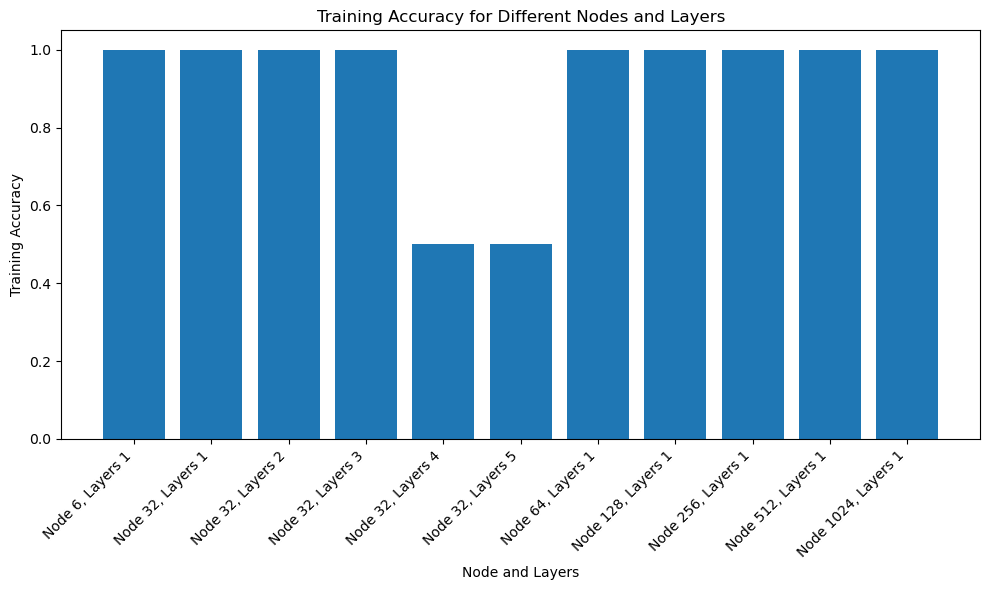

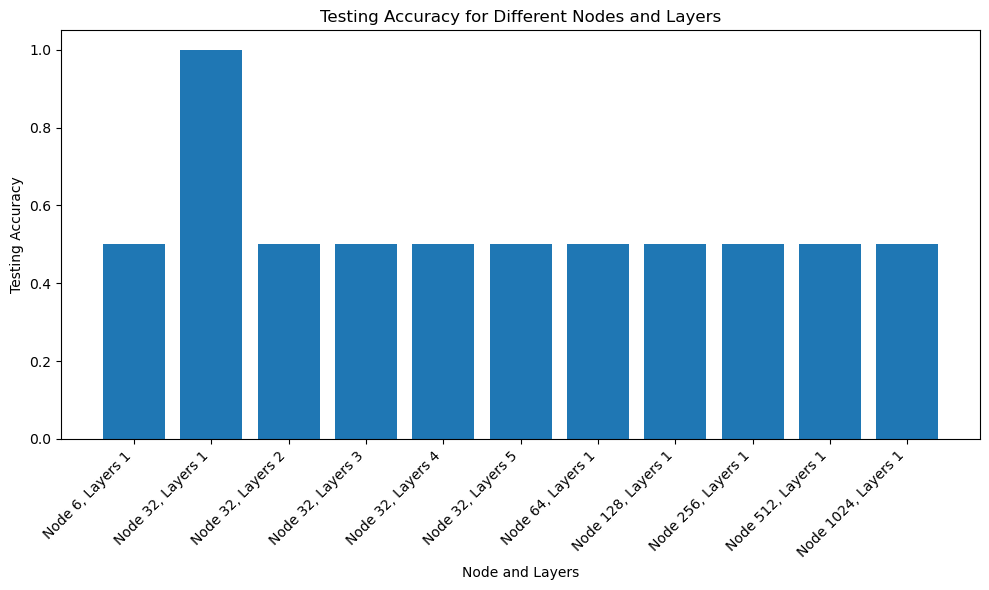

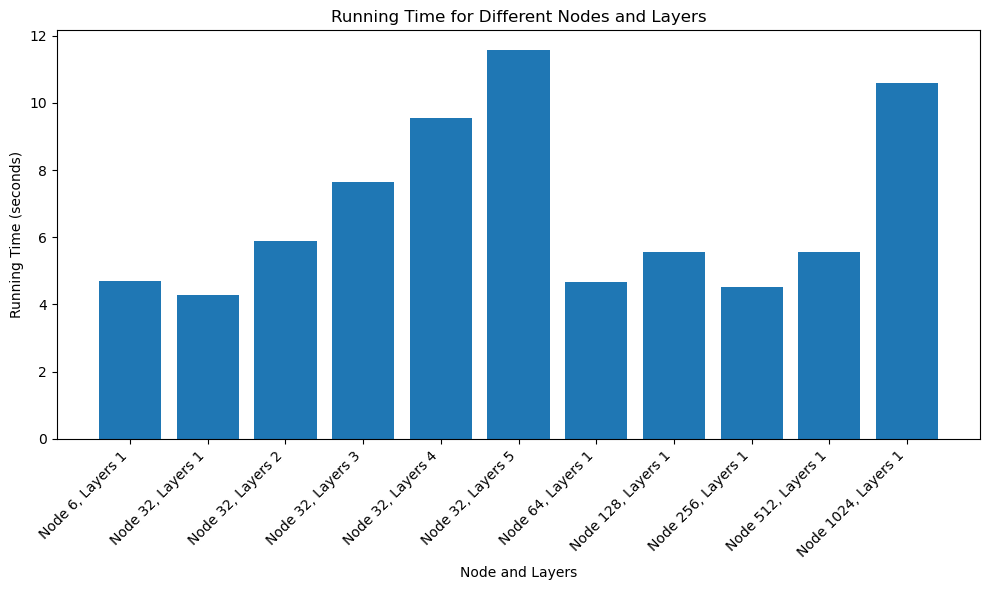

BEST CONFIGURATION: (32, 1)
Components of the Best Configuration:
Training Accuracy: 1.0
Testing Accuracy: 1.0
Running Time: 4.287349700927734


In [6]:
# Plot the graphs for Training Accuracy, Testing Accuracy, and Running Time for all nodes with their layers
x_labels = ["Node {}, Layers {}".format(node, layers) for node, layers in results.keys()]
train_accuracies = [values["Train Accuracy"] for values in results.values()]
test_accuracies = [values["Test Accuracy"] for values in results.values()]
running_times = [values["Running Time"] for values in results.values()]

# Plot the bar graph for Training Accuracy
plt.figure(figsize=(10, 6))
plt.bar(x_labels, train_accuracies)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Node and Layers")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy for Different Nodes and Layers")
plt.tight_layout()
plt.show()

# Plot the bar graph for Testing Accuracy
plt.figure(figsize=(10, 6))
plt.bar(x_labels, test_accuracies)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Node and Layers")
plt.ylabel("Testing Accuracy")
plt.title("Testing Accuracy for Different Nodes and Layers")
plt.tight_layout()
plt.show()

# Plot the bar graph for Running Time
plt.figure(figsize=(10, 6))
plt.bar(x_labels, running_times)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Node and Layers")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time for Different Nodes and Layers")
plt.tight_layout()
plt.show()

# Print the results for the best configuration
print("BEST CONFIGURATION:", best_config)
print("Components of the Best Configuration:")
print("Training Accuracy:", results[best_config]["Train Accuracy"])
print("Testing Accuracy:", results[best_config]["Test Accuracy"])
print("Running Time:", results[best_config]["Running Time"])


In [7]:
# Function to read text from a file and return the words
def read_text_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

# Function to clean and tokenize the text into words
def preprocess_text(text):
    # Remove unwanted characters and split the text into words
    words = text.strip().replace("\n", " ").split(" ")
    # Remove any empty strings from the list of words
    words = [word.strip() for word in words if word.strip()]
    return words

# Function to count the word frequency in a list of words
def count_word_frequency(words):
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return word_frequency

# Read and preprocess the Happy_Quotes.txt
happy_quotes_text = read_text_from_file("Happy_Quotes.txt")
happy_quotes_words = preprocess_text(happy_quotes_text)
happy_quotes_word_frequency = count_word_frequency(happy_quotes_words)

# Read and preprocess the Sad_Quotes.txt
sad_quotes_text = read_text_from_file("Sad_Quotes.txt")
sad_quotes_words = preprocess_text(sad_quotes_text)
sad_quotes_word_frequency = count_word_frequency(sad_quotes_words)

# Display the word frequency for Happy Quotes
print("Word Frequency for Happy Quotes:")
for word, frequency in happy_quotes_word_frequency.items():
    print(f"{word}: {frequency}")

# Display the word frequency for Sad Quotes
print("\nWord Frequency for Sad Quotes:")
for word, frequency in sad_quotes_word_frequency.items():
    print(f"{word}: {frequency}")

Word Frequency for Happy Quotes:
மகிழ்ச்சி: 5
உனக்கு: 1
அழகு: 1
கொடுக்கும்.: 1
என்பது: 2
ஒரு: 1
பெரிய: 1
ராஜா: 1
வாழ்க்கையை: 1
ஆட்சி: 1
செய்வது: 1
போன்றது.: 1
இதயத்தின்: 1
இனிமையான: 1
ஆபரணம்: 1
மழையைப்: 1
போன்றது: 1
என்: 1
அழகான: 1
கனவின்: 1
வேர்: 1
வழியாக: 1
வந்தது: 1

Word Frequency for Sad Quotes:
துக்கத்தைத்: 1
தடுக்க: 1
நம்மைச்: 1
சுற்றி: 1
நாம்: 1
கட்டும்: 1
சுவர்கள்: 1
மகிழ்ச்சியைத்: 1
தடுக்கின்றன: 1
'மகிழ்ச்சி': 1
என்ற: 1
வார்த்தை: 1
சோகத்தால்: 1
சமநிலைப்படுத்தப்படாவிட்டால்: 1
அதன்: 1
அர்த்தத்தை: 1
இழந்துவிடும்: 1
நல்ல: 2
வாழ்க்கை: 1
என்பது: 1
சோகத்திலிருந்து: 1
விடுபடுவது: 1
அல்ல,: 1
ஆனால்: 1
துன்பம்: 1
நம்: 1
வளர்ச்சிக்கு: 1
பங்களிக்கும்: 1
ஒன்றாகும்.: 1
நம்முடைய: 1
மிகப்பெரிய: 1
மகிழ்ச்சியும்,: 1
மிகப்: 1
பெரிய: 1
வலியும்: 1
மற்றவர்களுடனான: 1
நமது: 1
உறவில்: 1
வருகிறது: 1
சில: 1
நேரங்களில்,: 1
நீங்கள்: 1
ஒரு: 1
அழ: 1
வேண்டும்.: 1
காரணம்: 1
தெரியாவிட்டாலும்: 1


In [8]:
from tabulate import tabulate

# Function to read text from a file and return the words
def read_text_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

# Function to clean and tokenize the text into words
def preprocess_text(text):
    # Remove unwanted characters and split the text into words
    words = text.strip().replace("\n", " ").split(" ")
    # Remove any empty strings from the list of words
    words = [word.strip() for word in words if word.strip()]
    return words

# Function to count the word frequency in a list of words
def count_word_frequency(words):
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return word_frequency

# Function to create a neat table from word frequency dictionary
def create_table(word_frequency):
    table = []
    for word, frequency in word_frequency.items():
        table.append([word, frequency])
    return table

# Read and preprocess the Happy_Quotes.txt
happy_quotes_text = read_text_from_file("Happy_Quotes.txt")
happy_quotes_words = preprocess_text(happy_quotes_text)
happy_quotes_word_frequency = count_word_frequency(happy_quotes_words)

# Read and preprocess the Sad_Quotes.txt
sad_quotes_text = read_text_from_file("Sad_Quotes.txt")
sad_quotes_words = preprocess_text(sad_quotes_text)
sad_quotes_word_frequency = count_word_frequency(sad_quotes_words)

# Display the word frequency for Happy Quotes in a table
print("Word Frequency for Happy Quotes:")
happy_quotes_table = create_table(happy_quotes_word_frequency)
print(tabulate(happy_quotes_table, headers=["Word", "Frequency"], tablefmt="pretty"))

# Display the word frequency for Sad Quotes in a table
print("\nWord Frequency for Sad Quotes:")
sad_quotes_table = create_table(sad_quotes_word_frequency)
print(tabulate(sad_quotes_table, headers=["Word", "Frequency"], tablefmt="pretty"))

Word Frequency for Happy Quotes:
+-----------+-----------+
|   Word    | Frequency |
+-----------+-----------+
|  மகிழ்ச்சி  |     5     |
|   உனக்கு   |     1     |
|   அழகு    |     1     |
| கொடுக்கும். |     1     |
|   என்பது   |     2     |
|    ஒரு    |     1     |
|   பெரிய   |     1     |
|   ராஜா    |     1     |
| வாழ்க்கையை  |     1     |
|   ஆட்சி    |     1     |
|  செய்வது   |     1     |
|  போன்றது.  |     1     |
|  இதயத்தின்  |     1     |
| இனிமையான  |     1     |
|   ஆபரணம்   |     1     |
|  மழையைப்   |     1     |
|  போன்றது   |     1     |
|    என்     |     1     |
|   அழகான   |     1     |
|   கனவின்   |     1     |
|    வேர்    |     1     |
|  வழியாக   |     1     |
|   வந்தது   |     1     |
+-----------+-----------+

Word Frequency for Sad Quotes:
+------------------------+-----------+
|          Word          | Frequency |
+------------------------+-----------+
|        துக்கத்தைத்        |     1     |
|         தடுக்க          |     1     |
|         நம்ம